<a href="https://colab.research.google.com/github/sofiarguellesg/IN2039/blob/main/UKroadaccidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de accidentes de carros en UK

In [1]:
path='https://raw.githubusercontent.com/sofiarguellesg/IN2039/main/ukaccidents.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import statsmodels.api as sm
from sklearn import linear_model

In [3]:
df=pd.read_csv(path,index_col=[0])
df.head(2)

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
Column1                                                                 
0        200501BS00001               525680.0                  178240   
1        200501BS00002               524170.0                  181650   

         Longitude   Latitude  Police_Force  Accident_Severity  \
Column1                                                          
0        -0.191170  51.489096             1                  2   
1        -0.211708  51.520075             1                  3   

         Number_of_Vehicles  Number_of_Casualties        Date  ...  \
Column1                                                        ...   
0                         1                     1  04/01/2005  ...   
1                         1                     1  05/01/2005  ...   

             Pedestrian_Crossing-Physical_Facilities  \
Column1                                                
0                                     Zebra crossing   
1        Pedestrian phase at traffic signal junction   

                                Light_Conditions          Weather_Conditions  \
Column1                                                                        
0                 Daylight: Street light present  Raining without high winds   
1        Darkness: Street lights present and lit     Fine without high winds   

        Road_Surface_Conditions  Special_Conditions_at_Site  \
Column1                                                       
0                      Wet/Damp                         NaN   
1                           Dry                         NaN   

         Carriageway_Hazards Urban_or_Rural_Area  \
Column1                                            
0                        NaN                   1   
1                        NaN                   1   

         Did_Police_Officer_Attend_Scene_of_Accident  \
Column1                                                
0                                                Yes   
1                                                Yes   

        LSOA_of_Accident_Location  Year  
Column1                                  
0                       E01002849  2005  
1                       E01002909  2005  

[2 rows x 32 columns]

##Descripción de la base de datos

Esta base de datos nos da información sobre accidentes de autos ocurridos en el Reino Unido entre 2005.

In [4]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

##Descripción de las variables
- **Day_of_Week:** Día de la semana en que ocurrió el accidente. Es una variable categórica que va del 1 al 7.
- **Accident_Severity:** Esta variable nos dice la gravedad del accidente. Es una variable categórica que va del 1 al 3.
- **Weather_Conditions:** Esta variable nos dice como estaba el clima el día del accidente. Es una variable de texto.
- **Light_Conditions:** Nos dice las condiciones de la luz al momenton del accidente, si estaba oscuro o había luz. Es una variable de texto.
- **Accident Index** Es un número de registro para identificar el accidente. Es una variable de texto.
- **Road Type** Muestra el tipo de calle en la que ocurrió el accidente. Es una variable categórica.
- **Urban_or_Rural_Area** Es una variable categórica que nos dice si el accidente sucedió en una zona rural o urbana.
- **Latitude** Nos da las coordenadas del accidente. Es una variable numérica.
- **Longitude** Nos da las coordenadas del accidente. Es una variable numérica.
- **Number_of_Vehicles** Cantidad de vehiculos involucrados en el accidente. Es una variable numérica.


##Limpieza de base de datos

In [5]:
df.isnull().any()

Accident_Index                                 False
Location_Easting_OSGR                           True
Location_Northing_OSGR                         False
Longitude                                       True
Latitude                                       False
Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Date                                           False
Day_of_Week                                    False
Time                                            True
Local_Authority_(District)                     False
Local_Authority_(Highway)                      False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Control                                True
2nd_Road_Class                                 False
2nd_Road_Number                                False
Pedestrian_Crossing-Human_Control               True
Pedestrian_Crossing-Physical_Facilities         True
Light_Conditions                               False
Weather_Conditions                             False
Road_Surface_Conditions                        False
Special_Conditions_at_Site                      True
Carriageway_Hazards                             True
Urban_or_Rural_Area                            False
Did_Police_Officer_Attend_Scene_of_Accident    False
LSOA_of_Accident_Location                       True
Year                                           False
dtype: bool

In [6]:
df.shape

(75011, 32)

In [7]:
df.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                             31
Location_Northing_OSGR                             0
Longitude                                         31
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               1
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Control                               25804
2nd_Road_Class                                     0
2nd_Road_Number                                    0
Pedestrian_Crossing-Human_Control                 13
Pedestrian_Crossing-Physical_Facilities           17
Light_Conditions                                   0
Weather_Conditions                                 0
Road_Surface_Conditions                            0
Special_Conditions_at_Site                     73373
Carriageway_Hazards                            73821
Urban_or_Rural_Area                                0
Did_Police_Officer_Attend_Scene_of_Accident        0
LSOA_of_Accident_Location                        110
Year                                               0
dtype: int64

In [8]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [9]:
df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','Junction_Control','Special_Conditions_at_Site','Carriageway_Hazards','LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities'],axis=1,inplace=True)
df.head(2)

Accident_Index  Longitude   Latitude  Police_Force  Accident_Severity  \
Column1                                                                         
0        200501BS00001  -0.191170  51.489096             1                  2   
1        200501BS00002  -0.211708  51.520075             1                  3   

         Number_of_Vehicles  Number_of_Casualties        Date  Day_of_Week  \
Column1                                                                      
0                         1                     1  04/01/2005            3   
1                         1                     1  05/01/2005            4   

             Time  ...           Road_Type Speed_limit  2nd_Road_Class  \
Column1            ...                                                   
0        17:42:00  ...  Single carriageway          30              -1   
1        17:36:00  ...    Dual carriageway          30               5   

         2nd_Road_Number                         Light_Conditions  \
Column1                                                             
0                      0           Daylight: Street light present   
1                      0  Darkness: Street lights present and lit   

                 Weather_Conditions  Road_Surface_Conditions  \
Column1                                                        
0        Raining without high winds                 Wet/Damp   
1           Fine without high winds                      Dry   

         Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  Year  
Column1                                                                         
0                          1                                         Yes  2005  
1                          1                                         Yes  2005  

[2 rows x 24 columns]

In [10]:
df.dropna(subset=['Time'], inplace=True)


In [11]:
df.isnull().sum()

Accident_Index                                  0
Longitude                                      31
Latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Urban_or_Rural_Area                             0
Did_Police_Officer_Attend_Scene_of_Accident     0
Year                                            0
dtype: int64

##1. ¿Qué días de la semana tienen la mayor cantidad de accidentes?

In [12]:
ndf=pd.pivot_table(df,index='Day_of_Week',values='Accident_Index',aggfunc='count')
ndf.rename(columns={'Accident_Index':'Número de Accidentes'},inplace=True)
ndf

Número de Accidentes
Day_of_Week                      
1                            8213
2                           10478
3                           11227
4                           11477
5                           11204
6                           12214
7                           10197

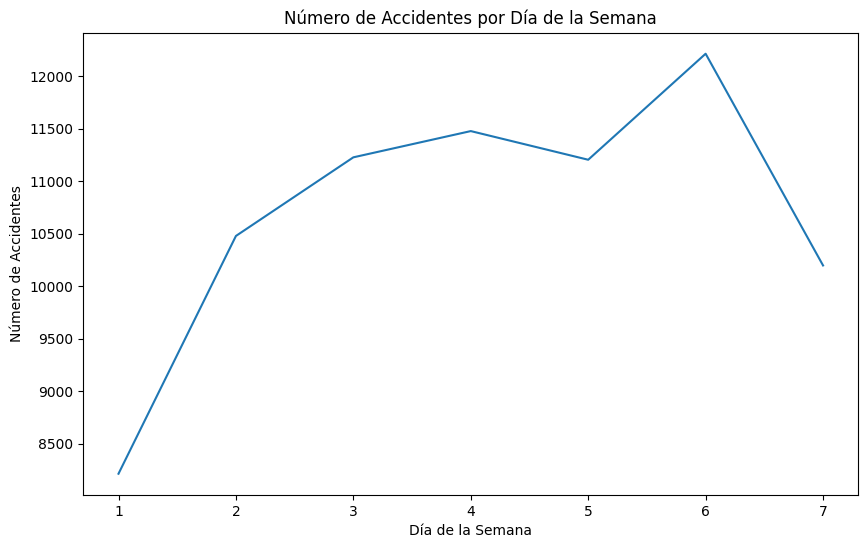

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=ndf.index, y=ndf['Número de Accidentes'])
plt.title('Número de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.show()


### Conclusión
El día con la mayor cantidad de accidentes es el día 6, el cual puede representar el Sábado, tiene un total de 12,214 registros. Por otro lado, el día con la menor cantidad de accidentes es el día 1 o Lunes con 8,213 registros.

##2. ¿Cuál es la relación entre las condiciones del clima y de la luz con la gravedad del accidente?

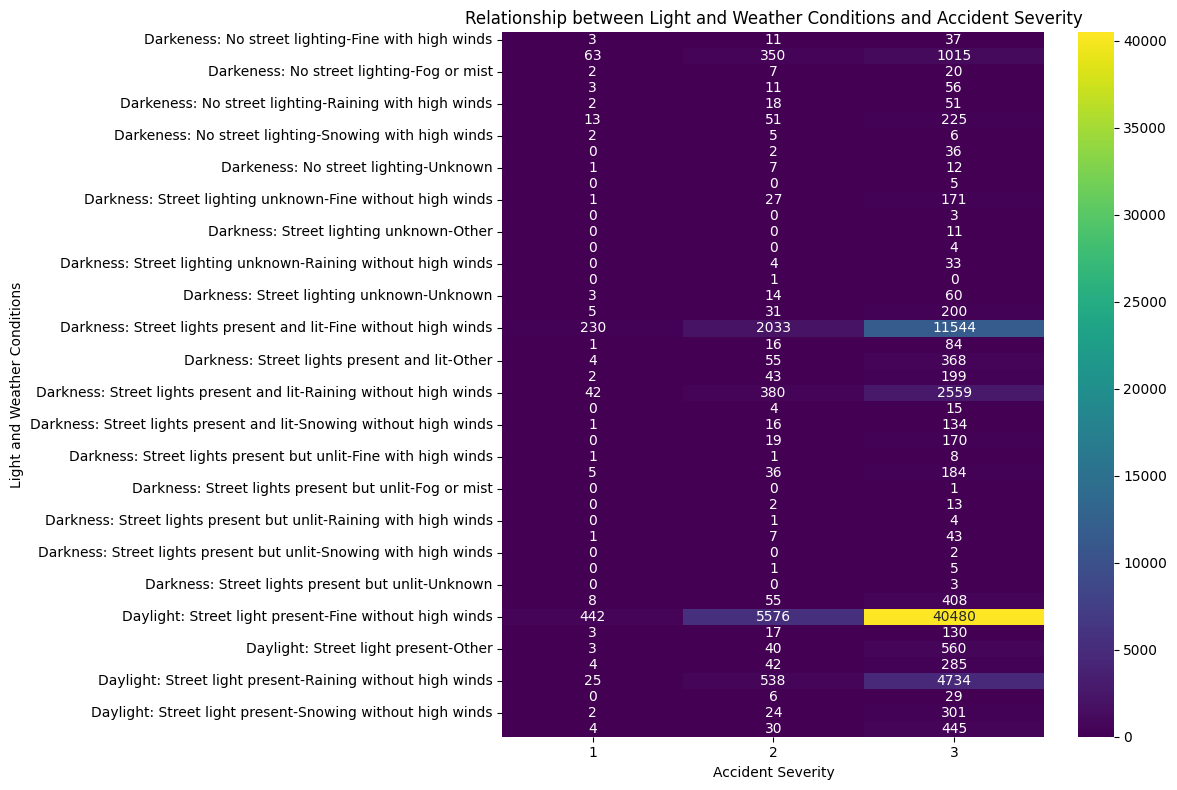

In [14]:
Li_Wh_con = df.groupby(['Light_Conditions', 'Weather_Conditions', 'Accident_Severity'])['Accident_Index'].count().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(Li_Wh_con, cmap='viridis', annot=True, fmt='g')
plt.title('Relationship between Light and Weather Conditions and Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Light and Weather Conditions')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Conclusión
En base al gráfico de calor, se puede observar que se registraron la mayor cantidad de accidentes cuando la había luz del día y con luz de la calle presente "Daylight: Street light present" y el clima era con altos vientos "Fine without high winds".

## 3. ¿Qué tipos de carreteras tienen más accidentes?

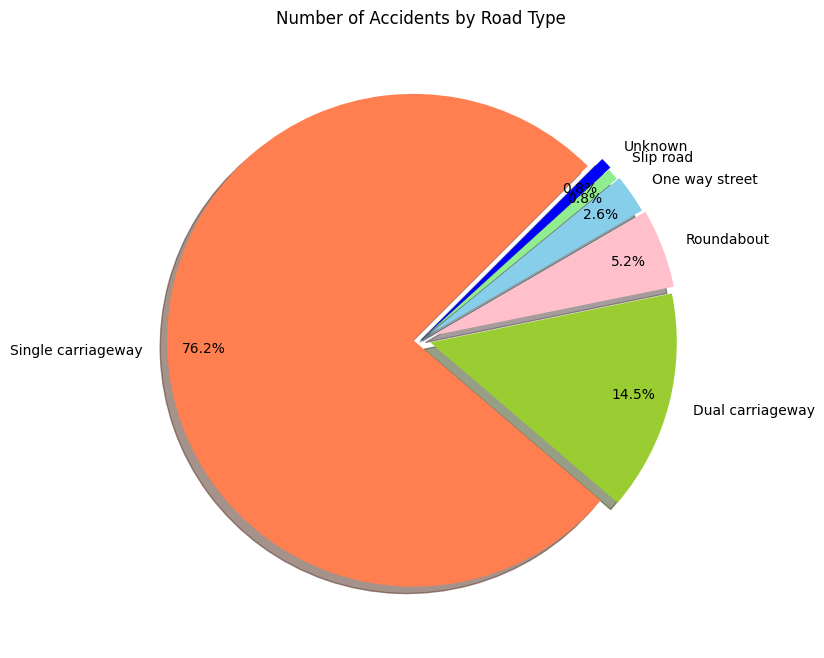

In [15]:
color_list = ['coral', 'yellowgreen', 'pink', 'skyblue', 'lightgreen', 'blue', 'pink', 'purple']
road_type_counts = df['Road_Type'].value_counts()
exp_list = [0.03, 0.04, 0.05, 0.04, 0.03, 0.04]

plt.figure(figsize=(8, 8))
plt.pie(road_type_counts, labels=road_type_counts.index, autopct='%1.1f%%', startangle=45, colors=color_list, explode=exp_list, pctdistance=0.85, shadow=True)
plt.title('Number of Accidents by Road Type')
plt.show()


### Conclusión
Las carreteras en las que ocurrieron la mayor cantidad de accidentes son "Single carriageway" con un 76.2%. Son las carreteras que no tienen una separación entre sus flujos opuestos.

## 4. ¿Cómo varía el número de accidentes según la ubicación (urbana vs rural)?

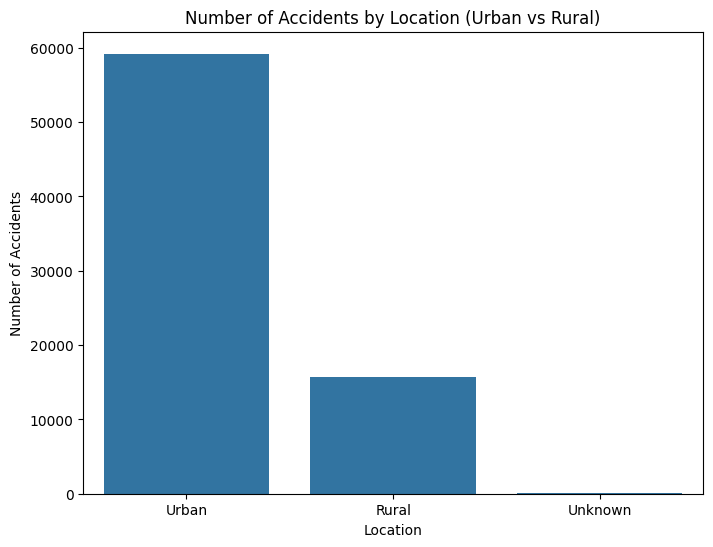

In [16]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace({1: 'Urban', 2: 'Rural', 3: 'Unknown'})
urban_rural_counts = df['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=urban_rural_counts.index, y=urban_rural_counts.values)
plt.title('Number of Accidents by Location (Urban vs Rural)')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.show()


### Conclusión
La mayor cantidad de accidentes de registraron en la zona Urbana con casi 60,000 accidentes.

## 5. ¿Cómo se representa en un mapa la ubicación de cada accidente?

In [17]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Accident_Severity", hover_data=["Weather_Conditions", "Day_of_Week"],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### Conclusión
En el mapa se puede ver que los principales accidentes se ubican al norte del Reino Unido y también se concentran en Londres.

## 6. ¿Cómo varía la severidad del accidente según el número de vehículos involucrados?

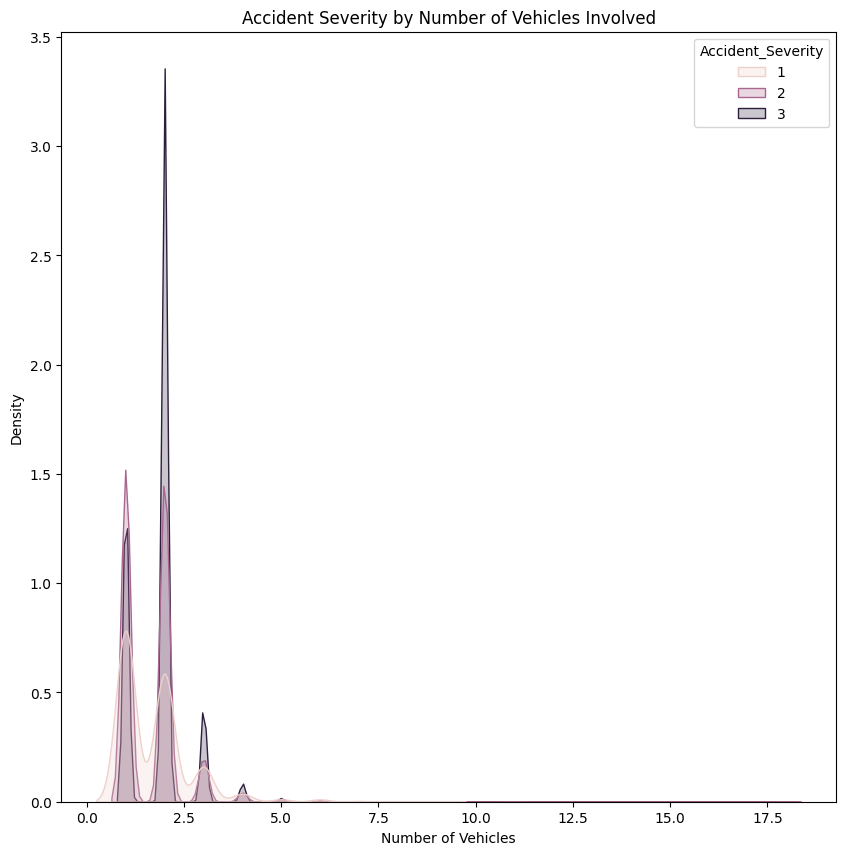

In [18]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df, x='Number_of_Vehicles', hue='Accident_Severity', common_norm=False, fill=True)
plt.title('Accident Severity by Number of Vehicles Involved')
plt.xlabel('Number of Vehicles')
plt.ylabel('Density')
plt.show()


### Conclusión
En base a este mapa de densidad, se puede ver que la mayor severidad de los accidentes se reportan con 2 vehículos con una severidad de 3.

## 7. ¿Cuál es la relación entre las condiciones de la superficie de la carretera y la severidad del accidente?


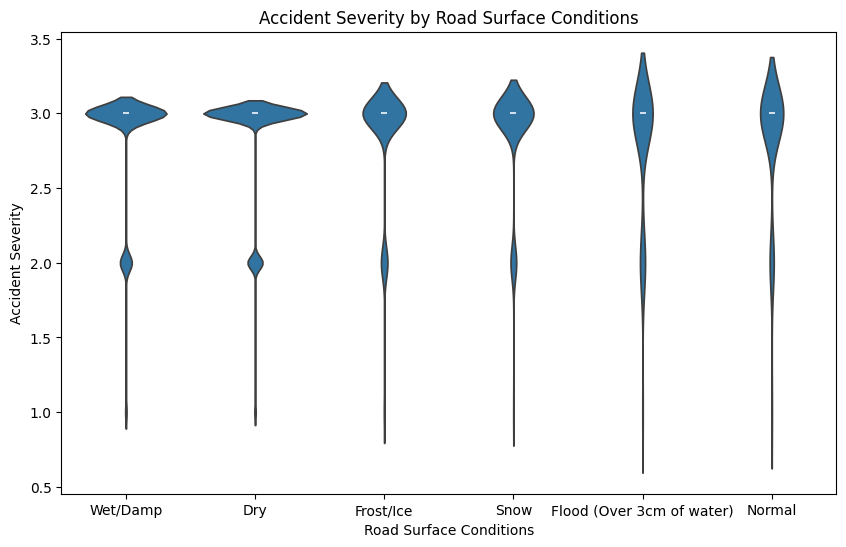

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Road_Surface_Conditions', y='Accident_Severity', data=df)
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Accident Severity')
plt.show()


### Conclusión
En este diagrama de violín, se puede observar que la mayor cantidad de accidentes severos (3) es cuando la carretera esta seca, seguido por cuando la carretera esta húmeda o mojada.

## 8. ¿Cuál es la severidad del accidente que más se repitió?

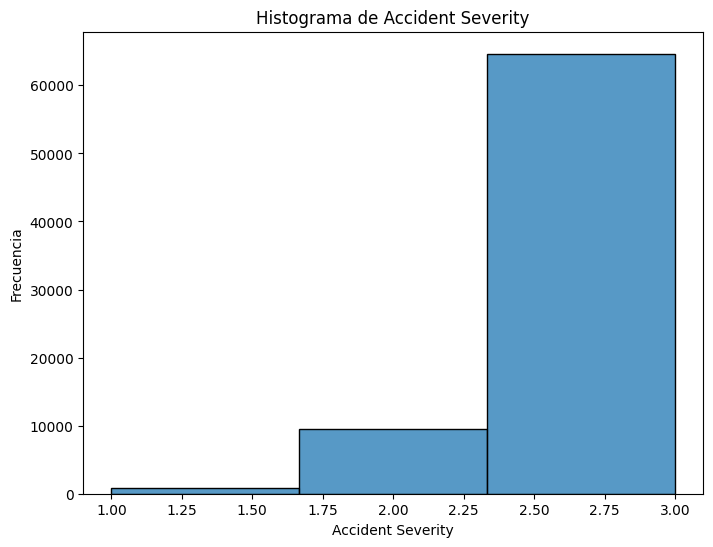

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Accident_Severity'], bins=3)
plt.title('Histograma de Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frecuencia')
plt.show()


### Conclusión
Se puede observar que la mayoría de los accidentes registrados tuvieron una severidad alta, nivel 3, tiene 60,000 entradas. Seguida por severidad 2 con un 10,000.

# Regresión con variable numérica
##Nota: Se utilizó otra base de datos ya que la primera contaba solo con variables categóricas.




In [21]:
path2 = 'https://raw.githubusercontent.com/sofiarguellesg/IN2039/main/Real%20estate%20valuation%20data%20set.csv'

In [22]:
ndf = pd.read_csv(path2,index_col=[0])
ndf.head()


tran_date  house_age  to_MRT_station convenience_stores  latitude  \
No                                                                      
1    2012.917       32.0        84.87882          Mayor a 7  24.98298   
2    2012.917       19.5       306.59470          Mayor a 7  24.98034   
3    2013.583       13.3       561.98450          Mayor a 7  24.98746   
4    2013.500       13.3       561.98450        Entre 5 y 7  24.98746   
5    2012.833        5.0       390.56840        Entre 5 y 7  24.97937   

    longitude  house_price  
No                          
1   121.54024         37.9  
2   121.53951         42.2  
3   121.54391         47.3  
4   121.54391         54.8  
5   121.54245         43.1

### Modelo de regresión para determinar el precio de la casa en venta (house_price) en base a la distancia en metros a una estación de MRT (to_MRT_station).

##9. ¿Cuál es el precio de una casa por metro cuadrado si esta a 750 metros de una estación de MRT?

house_price = b0 + b1 * to_MRT_station

In [23]:
favs = ['tran_date','house_age', 'to_MRT_station','convenience_stores','house_price']
ndf = ndf[favs].dropna()

In [24]:
modelA= sm.OLS.from_formula('house_price ~to_MRT_station',
                            data=ndf)
resultA=modelA.fit()
summary = resultA.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           4.64e-56
Time:                        14:38:18   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         45.8514      0.653     70.258      0.000      44.569      47.134
to_MRT_station    -0.0073      0.000    -18.500      0.000      -0.008      -0.006
==============================================================================
Omnibus:                      140.820   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              988.283
Skew:                           1.263   Prob(JB):                    2.49e-215
Kurtosis:                      10.135   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
params = resultA.params
Intercept = params['Intercept']
mrt_coef = params['to_MRT_station']

In [26]:
resi = resultA.resid
reg_vals = resultA.fittedvalues.to_frame()

In [27]:
final_grad = [ndf['house_price'],ndf['to_MRT_station'],reg_vals,resi]
fg_table = pd.concat(final_grad, axis = 1)

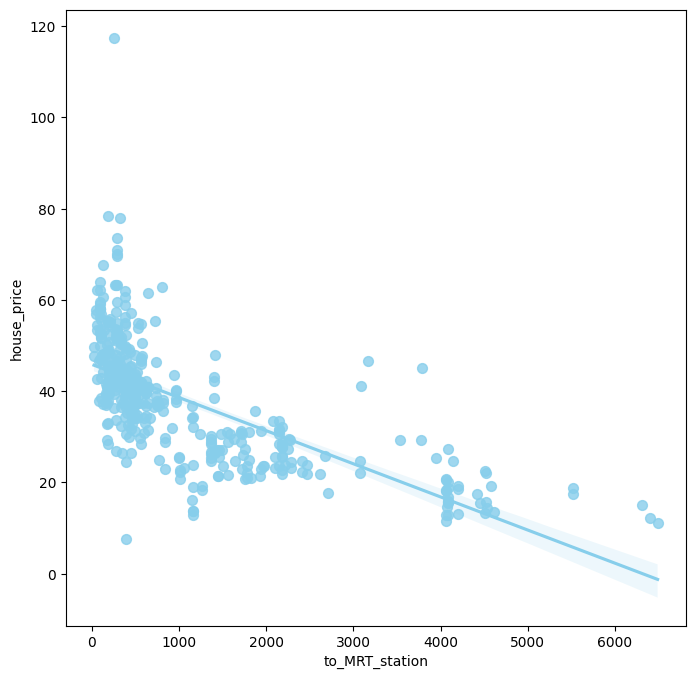

In [28]:
plt.figure(figsize=(8,8))
ax=sns.regplot(x='to_MRT_station',
                 y='house_price',
                 data = fg_table,
                color = 'skyblue',
               scatter_kws={'s':50}
               )

In [29]:
distMRT =750

#### Conclusión


In [30]:
print(f'El precio por unidad de una casa que está a {distMRT} m de una estación de MRT es :', Intercept+mrt_coef*distMRT)

El precio por unidad de una casa que está a 750 m de una estación de MRT es : 40.40488834416289


### Modelo de regresión para determinar el precio de la casa en venta (house_price) en base a la cantidad de tiendas de conveniencia cerca (convenience_stores).

## 10. ¿Cuál es el precio de una casa por metro cuadrado si esta cerca de 4 tiendas de conveniencia?

house_price = b0 + b1 * conviniences_stores

In [31]:
modelB= sm.OLS.from_formula('house_price ~convenience_stores',
                            data=ndf)
resultB=modelB.fit()
summary2 = resultB.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7199
Date:                Fri, 06 Sep 2024   Prob (F-statistic):              0.487
Time:                        14:38:19   Log-Likelihood:                -1667.0
No. Observations:                 414   AIC:                             3340.
Df Residuals:                     411   BIC:                             3352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          38.2933      1.172     32.678      0.000      35.990      40.597
convenience_stores[T.Mayor a 7]     1.2436      2.056      0.605      0.546      -2.797       5.284
convenience_stores[T.Menos a 5]    -0.9835      1.497     -0.657      0.511      -3.925       1.958
==============================================================================
Omnibus:                       49.608   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.543
Skew:                           0.631   Prob(JB):                     3.64e-25
Kurtosis:                       5.221   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
conv_st = 	38.2933 + 1 * 	1.2436 + 0 *	-0.9835
conv_st

39.5369

#### Conclusión

In [33]:
print('El precio de una casa por metro cuadrado si esta cerca de 4 tiendas de conveniencia es de:', conv_st)

El precio de una casa por metro cuadrado si esta cerca de 4 tiendas de conveniencia es de: 39.5369
